In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
pca = PCA(n_components=4)
pca.fit(z)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.explained_variance_ratio_)

[0.6255444  0.04913023 0.04121467 0.01874956]


In [10]:
sample = pca.transform(z)
sample[9]

array([-5.15569362,  0.51275568, -1.71171691, -0.47942951])

**Elbow using Sum of Squared Errors**

In [26]:
SSE={}
K = range(2,10)
for k in K :
    SSE[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print(labels)
    #print(sample_transformed)
    for i in range(0,k):
        #print('shit')
        cluster_datapoints = sample_transformed[labels==i]
        #print(cluster_datapoints)
        #Mean distance of data points in this cluster from center
        cluster_mean = cluster_datapoints[:,i].mean()
        print('cluster mean ='+str(cluster_mean))
        #Calculate Sum of Squared error by substracting cluster mean 
        #from distance of each point from respective centers 
        for datapoint in cluster_datapoints:
            SSE[k]+= (datapoint[i]-cluster_mean)**2
    print(SSE)

cluster mean =2.724531634649902
cluster mean =2.6897191648604104
{2: 12855.470218917046}
cluster mean =13.819663230612557
cluster mean =10.150438559803801
cluster mean =4.779194437371399
{2: 12855.470218917046, 3: 11878.168988809732}
cluster mean =10.818120784654226
cluster mean =14.19353836863842
cluster mean =10.029944958783174
cluster mean =13.646526661660253
{2: 12855.470218917046, 3: 11878.168988809732, 4: 11630.872119541897}
cluster mean =12.453080475236375
cluster mean =4.359870527782508
cluster mean =1.8413692014754979
cluster mean =4.210375853000854
cluster mean =12.390232022001914
{2: 12855.470218917046, 3: 11878.168988809732, 4: 11630.872119541897, 5: 8426.334397199449}
cluster mean =4.210896825237593
cluster mean =1.6842111043212766
cluster mean =14.534026753304559
cluster mean =16.307414663992795
cluster mean =4.037726994524224
cluster mean =1.5111702689212676
{2: 12855.470218917046, 3: 11878.168988809732, 4: 11630.872119541897, 5: 8426.334397199449, 6: 6341.920559893577}


In [28]:
SSE_array=[]
slope=[]
for key,value in SSE.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[12855.470218917046, 11878.168988809732, 11630.872119541897, 8426.334397199449, 6341.920559893577, 7551.079729517315, 4569.178335579327, 4970.490222837148]


[[2, -977.301230107314],
 [3, -247.29686926783506],
 [4, -3204.5377223424475],
 [5, -2084.413837305872],
 [6, 1209.1591696237383],
 [7, -2981.9013939379884],
 [8, 401.3118872578216]]

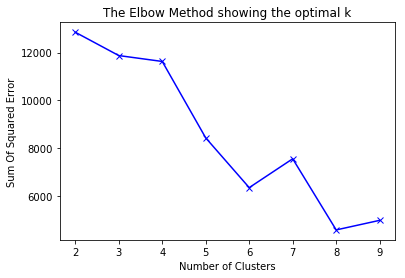

In [29]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Of Squared Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
slope

[[2, -977.301230107314],
 [3, -247.29686926783506],
 [4, -3204.5377223424475],
 [5, -2084.413837305872],
 [6, 1209.1591696237383],
 [7, -2981.9013939379884],
 [8, 401.3118872578216]]

In [32]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 5
